In [8]:
from simulations import *
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from examples import energy,schwinger_samples

# Optimization

In [9]:
points = []
def callback_func(x):
    points.append(schwinger_samples(x,10000))
    return False


def target_func(x):
    return schwinger_samples(x,10000)
#x0 = np.random.uniform(0, 2 * pi, 6)
# x0 = [5.04116483e-03, 1.09884935e+00, 8.26706055e-01, 3.41551829e+00,4.01166258e+00, 5.30849340e+00]
# x0 = [-8.96511828, 4.62359229, 4.44776618, 3.25604477, 1.46245918, 1.77980848]
  
def gradient_slsqp(x0):
    r = 3 / 2
    der = np.zeros_like(x0)
    x = np.copy(x0)
    for i in range(len(x0)):
        x[i] = x0[i] + pi / (4 * r)
        der[i] = r * target_func(x)
        x[i] = x0[i] - pi / (4 * r)
        der[i] -= r * target_func(x)
        x[i] = x0[i]
    return der

def gradient_hadamard(x0):
    der = np.zeros_like(x0)
    for i in range(0, len(x0)):
        j = i + 1
        der[i] = hadamard_test(x0, j)
    return der

## Hadamard_test (finite statistics)

random =  -1.4985
ne random =  -1.5066


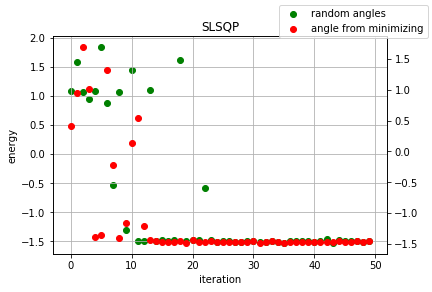

In [15]:
points = []; x0 = np.random.uniform(0, 2 * pi, 6);
result = minimize(target_func, x0=x0, callback=callback_func, method="SLSQP", jac=gradient_hadamard,options={'disp': False, 'maxiter': 50, 'eps': 0, 'ftol': 0})
iteration_number = [i for i in range(0, len(points))]

fig,ax1 = plt.subplots()
ax1.scatter(iteration_number, points, color='g', label = 'random angles');
ax1.grid(True); ax1.set_title('SLSQP');ax1.set_ylabel('energy'); ax1.set_xlabel('iteration');
print("random = " ,target_func(result.x))
ax2 = ax1.twinx()
points = [];x0 = [-8.96511828, 4.62359229, 4.44776618, 3.25604477, 1.46245918, 1.77980848]; 
result = minimize(target_func, x0=x0, callback=callback_func, method="SLSQP", jac=gradient_hadamard,options={'disp': False, 'maxiter': 50, 'eps': 0, 'ftol': 0})
iteration_number = [i for i in range(0, len(points))]
ax2.scatter(iteration_number, points, color='r', label = 'angle from minimizing');
fig.legend(loc = 'upper right');
print("ne random = " ,target_func(result.x))

## Histogram (infinite statistics)

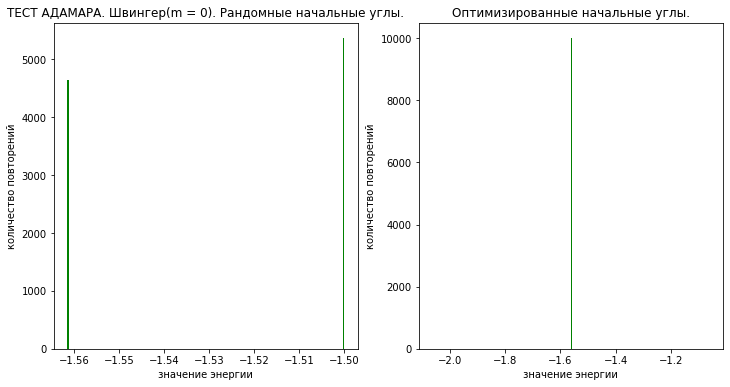

In [32]:
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))
with open('Vqe_data/vqe_hadamard_slsqp.txt', 'r') as file:
    nums = [row.strip() for row in file]
nums = list(map(float, nums))

plt1.hist(nums,bins=int(len(nums)/50), color = 'green');
plt1.set_ylabel('количество повторений')
plt1.set_xlabel('значение энергии')
plt1.set_title('ТЕСТ АДАМАРА. Швингер(m = 0). Рандомные начальные углы.')

with open('Vqe_data/vqe_hadamard_slsqp_norandom.txt', 'r') as file:
    nums = [row.strip() for row in file]
nums = list(map(float, nums))
plt2.hist(nums,bins=int(len(nums)/50), color = 'green');
plt2.set_ylabel('количество повторений')
plt2.set_xlabel('значение энергии')
plt2.set_title('Оптимизированные начальные углы.');

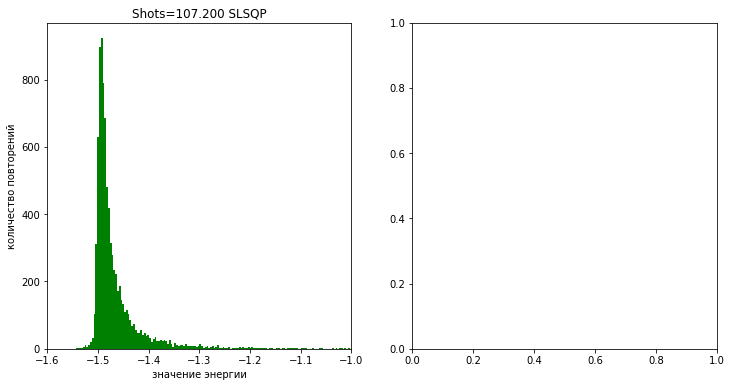

In [18]:
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))
with open('Vqe_data/vqe_hadamard_slsqp_random_107200.txt', 'r') as file:
    nums = [row.strip() for row in file]
nums = list(map(float, nums))
plt1.hist(nums,bins=int(len(nums)/10), color = 'green');
plt1.set_xlim(-1.6,-1)
plt1.set_ylabel('количество повторений')
plt1.set_xlabel('значение энергии')
plt1.set_title('Shots=107.200 SLSQP');